### Zindi called for a competition, in collaboration with Sendy - A logistics platform, that transports consumers' product from one location to another.
### The challenge is to build a model that can accurately predict estimated time of arrival for orders from pick-up to drop-off

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Injecting datasets
data  = {'train':pd.read_csv('Train.csv', na_values='NaN'), 'rider':pd.read_csv('Riders.csv', na_values='NaN'),
        'test':pd.read_csv('Test.csv', na_values='NaN'), 'dic':pd.read_csv('VariableDefinitions.csv')}

In [3]:
# Accessed dictionary file to have deep understanding of each variable
data['dic'].head()

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31


In [4]:
data['train'].head(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455


In [5]:
data['train'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

### Order No and Userid values are object type, values will be converted to interger by removing preceded values before those numbers

In [6]:
data['train']['Order No']=data['train']['Order No'].str.split('_').str.get(-1)

In [7]:
data['train']['User Id'] = data['train']['User Id'].str.split('_').str.get(-1)

In [8]:
data['train']['User Id'] = pd.to_numeric(data['train']['User Id'])
data['train']['Order No'] = pd.to_numeric(data['train']['Order No'])

### Function to convert time to 24 hours

In [9]:
# Python program to convert time 
# from 12 hour to 24 hour format 
  
# Function to convert the date format 
def convert24(str1): 
      
    # Checking if last two elements of time 
    # is AM and first two elements are 12 
    if str1[-2:] == "AM" and str1[:2] == "12": 
        return "00" + str1[2:-2] 
          
    # remove the AM     
    elif str1[-2:] == "AM": 
        return str1[:-2] 
      
    # Checking if last two elements of time 
    # is PM and first two elements are 12    
    elif str1[-2:] == "PM" and str1[:2] == "12": 
        return str1[:-2] 
    # checking if first two elements of time are 2digits and last two is PM
    # Add 12 to hours
    elif str1[-2:] == "PM" and str1[:2] == "10" or str1[:2] == "11":
        return str(int(str1[:2]) + 12) + str1[2:8]
          
    else: 
          
        # add 12 to hours with first digit having one single element and remove PM 
        add_0 = '0' + str1[:1]
        return str(int(str1[:1]) + 12) + ':' + str1[2:8]
  
# Driver Code         
print(convert24("11:39:25 PM")) 

23:39:25


In [10]:
# Columns of time that needs to be changed to 24 hours
time_col = ['Placement - Time', 'Confirmation - Time', 'Pickup - Time', 'Arrival at Destination - Time', 'Arrival at Pickup - Time']

In [11]:
for i in time_col:
    data['train'][i] = data['train'][i].apply(convert24)

In [12]:
data['train']

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,4211,633,Bike,3,Business,9,5,9:35:46,9,5,...,10:39:55,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,25375,2285,Bike,3,Personal,12,5,11:16:16,12,5,...,12:17:22,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,1899,265,Bike,3,Business,30,2,12:39:25,30,2,...,13:00:38,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,9336,1402,Bike,3,Business,15,5,9:25:34,15,5,...,10:05:27,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,27883,1737,Bike,1,Personal,13,1,9:55:18,13,1,...,10:25:37,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,8834,2001,Bike,3,Personal,20,3,15:54:38,20,3,...,16:20:17,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9
21197,22892,1796,Bike,3,Business,13,6,10:13:34,13,6,...,10:46:17,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770
21198,2831,2956,Bike,3,Business,7,4,17:06:16,7,4,...,18:40:05,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,6174,2524,Bike,1,Personal,4,3,9:31:39,4,3,...,10:08:15,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380


# converting time to seconds

In [13]:
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)


print(get_sec('23:59:45'))

86385


In [14]:
for i in time_col:
    data['train'][i] = data['train'][i].apply(get_sec)
data['train']

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,4211,633,Bike,3,Business,9,5,34546,9,5,...,38395,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,25375,2285,Bike,3,Personal,12,5,40576,12,5,...,44242,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,1899,265,Bike,3,Business,30,2,45565,30,2,...,46838,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,9336,1402,Bike,3,Business,15,5,33934,15,5,...,36327,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,27883,1737,Bike,1,Personal,13,1,35718,13,1,...,37537,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,8834,2001,Bike,3,Personal,20,3,57278,20,3,...,58817,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9
21197,22892,1796,Bike,3,Business,13,6,36814,13,6,...,38777,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770
21198,2831,2956,Bike,3,Business,7,4,61576,7,4,...,67205,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,6174,2524,Bike,1,Personal,4,3,34299,4,3,...,36495,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380


In [15]:
data['train'].isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [16]:
data['train'].shape

(21201, 29)

In [17]:
# 'Precipitation in millimeter' missing values takes takes over 90% of the data, so i'm dropping the column
data['train'] = data['train'].drop('Precipitation in millimeters', axis =1)

In [18]:
data['train']['Temperature'].min()

11.2

In [19]:
data['train']['Temperature'].max()

32.1

# filling missing values with mean for Temperature variable
#### I used interpolation to fill missing values, this is beause, using fillna or imputation results to large number of outliers

In [20]:
data['train']['Temperature'] = data['train']['Temperature'].interpolate()
data['train'][['Temperature', 'Time from Pickup to Arrival']].corr()

,Temperature,Time from Pickup to Arrival
Temperature,1.000000,0.003852
Time from Pickup to Arrival,0.003852,1.000000


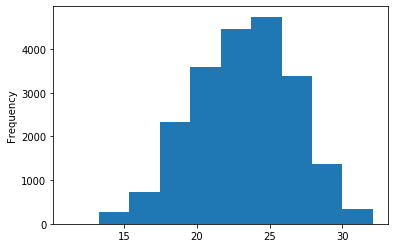

In [21]:
data['train']['Temperature'].plot.hist()

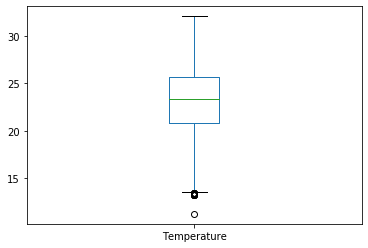

In [22]:
data['train']['Temperature'].plot.box()

In [23]:
# Renaming all columns to readable 
columns = data['train'].columns
columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time from Pickup to Arrival'],
      dtype='object')

In [24]:
columns = columns.str.replace('-', '').str.replace('(Mo = 1)', '').str.replace('(', '').str.replace(')', '').str.replace('(KM)', '').str.rstrip(' ').str.replace(' ', '_')

In [25]:
data['train'].columns = columns

In [26]:
data['train']

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday,Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday,...,Arrival_at_Destination__Weekday,Arrival_at_Destination__Time,Distance,Temperature,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,4211,633,Bike,3,Business,9,5,34546,9,5,...,5,38395,4,20.4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,25375,2285,Bike,3,Personal,12,5,40576,12,5,...,5,44242,16,26.4,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,1899,265,Bike,3,Business,30,2,45565,30,2,...,2,46838,3,22.8,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,9336,1402,Bike,3,Business,15,5,33934,15,5,...,5,36327,9,19.2,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,27883,1737,Bike,1,Personal,13,1,35718,13,1,...,1,37537,9,15.4,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,8834,2001,Bike,3,Personal,20,3,57278,20,3,...,3,58817,3,28.6,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9
21197,22892,1796,Bike,3,Business,13,6,36814,13,6,...,6,38777,7,26.0,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770
21198,2831,2956,Bike,3,Business,7,4,61576,7,4,...,4,67205,20,29.2,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,6174,2524,Bike,1,Personal,4,3,34299,4,3,...,3,36495,13,15.0,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380


In [27]:
data['train']['Vehicle_Type'].value_counts()

Bike    21201
Name: Vehicle_Type, dtype: int64

In [28]:
# Removing Vehicle Type since its just one value
data['train'] = data['train'].drop('Vehicle_Type', axis =1)

### Handling days of the week 

In [29]:
### Define functions that convert numbers to days of week
def week_days(str1):
    if str1 == 1:
        return 'monday'
    elif str1 == 2:
        return 'tuesday'
    elif str1 == 3:
        return 'wednesday'
    elif str1 == 4:
        return 'thursday'
    elif str1 == 5:
        return 'friday'
    elif str1 ==6:
        return 'saturday'
    else:
        return 'sunday'

In [30]:
# list of columns that i convert their values to days of the week
weekdays = []
for i in data['train'].columns:
    if 'Weekday' in i:
        weekdays.append(i)
    else:
        pass

In [31]:
# iterate weekdays variable to convert to days
for i in data['train'][weekdays]:
    data['train'][i] = data['train'][i].apply(week_days)

In [32]:
data['train'][weekdays]

,Placement__Weekday,Confirmation__Weekday,Arrival_at_Pickup__Weekday,Pickup__Weekday,Arrival_at_Destination__Weekday
0,friday,friday,friday,friday,friday
1,friday,friday,friday,friday,friday
2,tuesday,tuesday,tuesday,tuesday,tuesday
3,friday,friday,friday,friday,friday
4,monday,monday,monday,monday,monday
...,...,...,...,...,...
21196,wednesday,wednesday,wednesday,wednesday,wednesday
21197,saturday,saturday,saturday,saturday,saturday
21198,thursday,thursday,thursday,thursday,thursday
21199,wednesday,wednesday,wednesday,wednesday,wednesday


## Platform type

In [33]:
data['train'].groupby(['Placement__Time']).mean()#.corr()#, 'Time_from_Pickup_to_Arrival']].corr()

,Order_No,User_Id,Platform_Type,Placement__Day_of_Month,Confirmation__Day_of_Month,Confirmation__Time,Arrival_at_Pickup__Day_of_Month,Arrival_at_Pickup__Time,Pickup__Day_of_Month,Pickup__Time,Arrival_at_Destination__Day_of_Month,Arrival_at_Destination__Time,Distance,Temperature,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival
Placement__Time,,,,,,,,,,,,,,,,,,,
436,952.0,1905.0,3.0,22.0,22.0,515.0,22.0,731.0,22.0,2992.0,22.0,2997.0,2.0,18.60,-1.303971,36.768817,-1.301809,36.756430,5.0
23742,3771.0,3748.0,1.0,5.0,5.0,25442.0,5.0,28809.0,5.0,29756.0,5.0,31783.0,20.0,15.60,-1.191775,36.921199,-1.277263,36.792225,2027.0
24184,11956.0,3091.0,3.0,14.0,14.0,24497.0,14.0,29666.0,14.0,29846.0,14.0,32389.0,9.0,17.70,-1.301201,36.764868,-1.290894,36.822971,2543.0
24699,10351.0,1858.0,1.0,28.0,28.0,25619.0,28.0,27932.0,28.0,28093.0,28.0,30861.0,21.0,20.40,-1.253653,36.684954,-1.304119,36.819649,2768.0
24798,17021.0,3624.0,1.0,4.0,4.0,24810.0,4.0,25542.0,4.0,27084.0,4.0,28721.0,14.0,14.30,-1.209156,36.775370,-1.265590,36.802700,1637.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77283,3020.0,2658.0,3.0,1.0,1.0,77314.0,1.0,77394.0,1.0,78183.0,1.0,80340.0,11.0,23.40,-1.296310,36.768822,-1.258430,36.690360,2157.0
77895,3139.0,1769.0,2.0,23.0,23.0,78902.0,23.0,80022.0,23.0,80359.0,23.0,81434.0,12.0,18.30,-1.257729,36.741077,-1.278298,36.827324,1075.0
79010,25565.0,3565.0,3.0,26.0,26.0,79079.0,26.0,79575.0,26.0,79996.0,26.0,81358.0,6.0,18.50,-1.287904,36.821793,-1.284467,36.786611,1362.0


In [34]:
### converting Platform type categorical variable
plat_cat = {1:'A', 2:'B', 3:'C', 4:'D'}
data['train']['Platform_Type'] = data['train']['Platform_Type'].map(plat_cat)

In [35]:
pl_grp = data['train'].groupby(['Platform_Type'])

In [36]:
pl_grp.corr()

Order_No   User_Id  \
Platform_Type                                                   
A             Order_No                     1.000000 -0.003227   
              User_Id                     -0.003227  1.000000   
              Placement__Day_of_Month      0.020976 -0.003872   
              Placement__Time              0.035593  0.001725   
              Confirmation__Day_of_Month   0.020976 -0.003872   
...                                             ...       ...   
D             Pickup_Lat                   0.155106       NaN   
              Pickup_Long                 -0.120429       NaN   
              Destination_Lat              0.042619       NaN   
              Destination_Long            -0.012609       NaN   
              Time_from_Pickup_to_Arrival -0.169994       NaN   

                                           Placement__Day_of_Month  \
Platform_Type                                                        
A             Order_No                                    0.020976   
              User_Id                                    -0.003872   
              Placement__Day_of_Month                     1.000000   
              Placement__Time                             0.013300   
              Confirmation__Day_of_Month                  1.000000   
...                                                            ...   
D             Pickup_Lat                                  0.006636   
              Pickup_Long                                 0.237037   
              Destination_Lat                             0.225943   
              Destination_Long                            0.343530   
              Time_from_Pickup_to_Arrival                 0.190508   

                                           Placement__Time  \
Platform_Type                                                
A             Order_No                            0.035593   
              User_Id                             0.001725   
              Placement__Day_of_Month             0.013300   
              Placement__Time                     1.000000   
              Confirmation__Day_of_Month          0.013300   
...                                                    ...   
D             Pickup_Lat                          0.036838   
              Pickup_Long                        -0.394123   
              Destination_Lat                    -0.033932   
              Destination_Long                   -0.294690   
              Time_from_Pickup_to_Arrival        -0.231893   

                                           Confirmation__Day_of_Month  \
Platform_Type                                                           
A             Order_No                                       0.020976   
              User_Id                                       -0.003872   
              Placement__Day_of_Month                        1.000000   
              Placement__Time                                0.013300   
              Confirmation__Day_of_Month                     1.000000   
...                                                               ...   
D             Pickup_Lat                                     0.006636   
              Pickup_Long                                    0.237037   
              Destination_Lat                                0.225943   
              Destination_Long                               0.343530   
              Time_from_Pickup_to_Arrival                    0.190508   

                                           Confirmation__Time  \
Platform_Type                                                   
A             Order_No                               0.035480   
              User_Id                               -0.000018   
              Placement__Day_of_Month                0.010177   
              Placement__Time                        0.996088   
              Confirmation__Day_of_Month             0.010177   
...                                                       ...   
D        

In [37]:
# For the sake of high cardinality in day of the months, all day in the month variables will be removed.
for i in data['train'].columns:
    if 'Month' in i:
        data['train']=data['train'].drop(i,axis=1)

In [38]:
data['train'].columns

Index(['Order_No', 'User_Id', 'Platform_Type', 'Personal_or_Business',
       'Placement__Weekday', 'Placement__Time', 'Confirmation__Weekday',
       'Confirmation__Time', 'Arrival_at_Pickup__Weekday',
       'Arrival_at_Pickup__Time', 'Pickup__Weekday', 'Pickup__Time',
       'Arrival_at_Destination__Weekday', 'Arrival_at_Destination__Time',
       'Distance', 'Temperature', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival'],
      dtype='object')

In [39]:
# Cleaning riders variable
data['train']['Rider_Id'] = data['train']['Rider_Id'].str.split('_').str.get(-1).astype(np.int64)

In [40]:
data['train'].describe()

,Order_No,User_Id,Placement__Time,Confirmation__Time,Arrival_at_Pickup__Time,Pickup__Time,Arrival_at_Destination__Time,Distance,Temperature,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,14111.248668,1849.914910,46182.663695,46615.894816,47392.416254,48136.602660,49693.523607,9.506533,23.247491,-1.281470,36.811264,-1.282581,36.811220,466.924390,1556.920947
std,8167.044271,1138.956049,9090.211849,9139.332233,9146.488556,9131.670601,9196.430890,5.668963,3.435423,0.030507,0.037473,0.034824,0.044721,280.950952,987.270788
min,1.000000,0.000000,436.000000,515.000000,731.000000,2992.000000,2997.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,0.000000,1.000000
25%,7003.000000,817.000000,38806.000000,39189.000000,39937.000000,40682.000000,42191.000000,5.000000,20.800000,-1.300921,36.784605,-1.301201,36.785661,208.000000,882.000000
50%,14073.000000,1810.000000,45836.000000,46272.000000,47057.000000,47826.000000,49404.000000,8.000000,23.400000,-1.279395,36.807040,-1.284382,36.808002,453.000000,1369.000000
75%,21183.000000,2881.000000,53425.000000,53904.000000,54645.000000,55384.000000,56949.000000,13.000000,25.700000,-1.257147,36.829741,-1.261177,36.829477,709.000000,2040.000000
max,28268.000000,3781.000000,82021.000000,82762.000000,83400.000000,83621.000000,83996.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,959.000000,7883.000000


In [41]:
data['train'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 22 columns):
Order_No                           21201 non-null int64
User_Id                            21201 non-null int64
Platform_Type                      21201 non-null object
Personal_or_Business               21201 non-null object
Placement__Weekday                 21201 non-null object
Placement__Time                    21201 non-null int64
Confirmation__Weekday              21201 non-null object
Confirmation__Time                 21201 non-null int64
Arrival_at_Pickup__Weekday         21201 non-null object
Arrival_at_Pickup__Time            21201 non-null int64
Pickup__Weekday                    21201 non-null object
Pickup__Time                       21201 non-null int64
Arrival_at_Destination__Weekday    21201 non-null object
Arrival_at_Destination__Time       21201 non-null int64
Distance                           21201 non-null int64
Temperature                        21201 non

In [42]:
import os
os.environ['PROJ_LIB'] = '/home/workspace/miniconda3/share/proj'
from mpl_toolkits.basemap import Basemap


/home/workspace/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


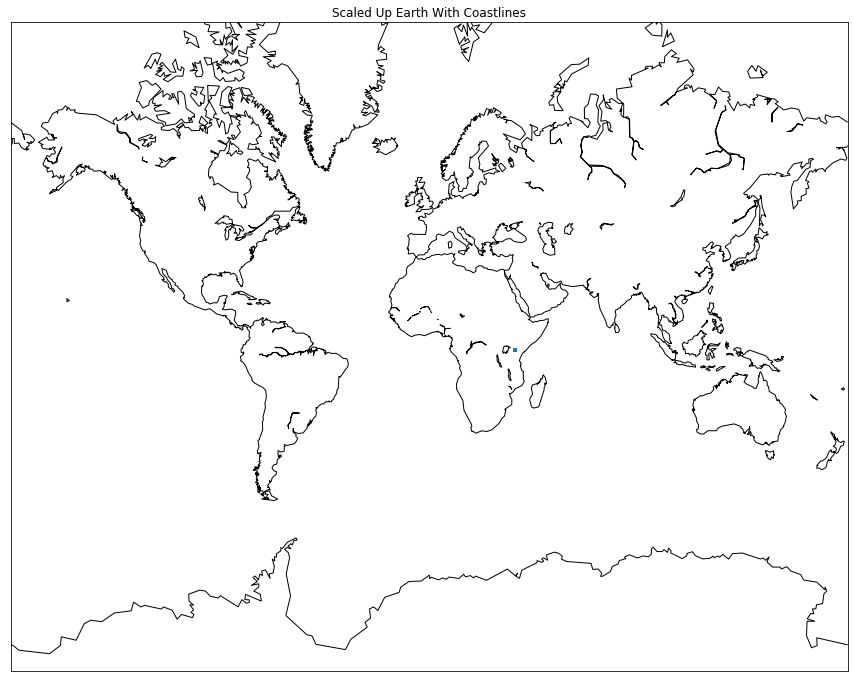

In [43]:
# Add code here, before creating the Basemap instance.
fig, ax = plt.subplots(figsize=(15, 20))
ax.set_title('Scaled Up Earth With Coastlines')

m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = data['train']["Destination_Long"].tolist()
latitudes = data['train']["Destination_Lat"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

### Selecting dependent and independent variables for buidling predictive models

In [44]:
data['train'].columns

Index(['Order_No', 'User_Id', 'Platform_Type', 'Personal_or_Business',
       'Placement__Weekday', 'Placement__Time', 'Confirmation__Weekday',
       'Confirmation__Time', 'Arrival_at_Pickup__Weekday',
       'Arrival_at_Pickup__Time', 'Pickup__Weekday', 'Pickup__Time',
       'Arrival_at_Destination__Weekday', 'Arrival_at_Destination__Time',
       'Distance', 'Temperature', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival'],
      dtype='object')

In [45]:
X = data['train'].iloc[:, :-1]

In [46]:
y= data['train'].iloc[:, -1]

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 21 columns):
Order_No                           21201 non-null int64
User_Id                            21201 non-null int64
Platform_Type                      21201 non-null object
Personal_or_Business               21201 non-null object
Placement__Weekday                 21201 non-null object
Placement__Time                    21201 non-null int64
Confirmation__Weekday              21201 non-null object
Confirmation__Time                 21201 non-null int64
Arrival_at_Pickup__Weekday         21201 non-null object
Arrival_at_Pickup__Time            21201 non-null int64
Pickup__Weekday                    21201 non-null object
Pickup__Time                       21201 non-null int64
Arrival_at_Destination__Weekday    21201 non-null object
Arrival_at_Destination__Time       21201 non-null int64
Distance                           21201 non-null int64
Temperature                        21201 non

In [48]:
X = pd.get_dummies(X)

In [49]:
X['Temperature']

0        20.4
1        26.4
2        22.8
3        19.2
4        15.4
         ... 
21196    28.6
21197    26.0
21198    29.2
21199    15.0
21200    30.9
Name: Temperature, Length: 21201, dtype: float64

#### After Creating dummies, dropping one variable from each of newly created dummy variables is required to avoid dummy variable trap. This is simply to avoid overftting.

In [50]:
X = X.drop(['Platform_Type_D', 'Personal_or_Business_Personal', 'Placement__Weekday_sunday', 
          'Confirmation__Weekday_sunday', 'Arrival_at_Pickup__Weekday_sunday', 
          'Pickup__Weekday_sunday', 'Arrival_at_Destination__Weekday_sunday'], axis =1)

In [51]:
X.shape

(21201, 48)

## Splitting dataset to derive validation set.

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

In [54]:
print('size of train independent variables:',X_train.shape)
print('size of test independent variables:',X_test.shape)

size of train independent variables: (16960, 48)
size of test independent variables: (4241, 48)


### Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/home/workspace/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/workspace/miniconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/workspace/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
# Building Model using 

In [58]:
X_train, X_test

(array([[-1.08356134,  0.64970233, -0.72853427, ...,  1.99632231,
         -0.47675544, -0.46751031],
        [ 0.51707125,  0.10398886, -0.90751438, ..., -0.50092112,
         -0.47675544,  2.13899028],
        [-0.25112923, -1.52612144,  0.60051397, ..., -0.50092112,
         -0.47675544, -0.46751031],
        ...,
        [ 0.13389212, -0.53663131, -0.72413672, ..., -0.50092112,
         -0.47675544, -0.46751031],
        [-1.22393754,  0.42385956, -0.78493279, ...,  1.99632231,
         -0.47675544, -0.46751031],
        [ 1.16798453,  0.84039448, -0.57132201, ...,  1.99632231,
         -0.47675544, -0.46751031]]),
 array([[-1.11684388, -0.05331019,  2.03499337, ..., -0.50092112,
         -0.47675544, -0.46751031],
        [-0.96701102, -0.09373341,  1.29983367, ..., -0.50092112,
         -0.47675544, -0.46751031],
        [ 0.85493209,  1.51440775, -0.3095581 , ..., -0.50092112,
         -0.47675544, -0.46751031],
        ...,
        [-0.66329242,  1.26835336,  0.53070294, ..., -

### Fitting Multiple linear regression libraries into the training set

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
# Testing accuracy of the model using validation test
y_pred = regressor.predict(X_test)

In [61]:
# Checking how close how prediction is to ground truth, using RMSE metrics

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))

In [62]:
#Loss Error check
rms

1.0029461007972813

In [72]:
#Accuracy Check
from sklearn import metrics

print(metrics.r2_score(y_test, y_pred) * 100)

99.99989607371828


In [63]:
y_test = pd.DataFrame(y_test).reset_index()

In [64]:
y_test = y_test['Time_from_Pickup_to_Arrival']

In [65]:
predicted_value = pd.DataFrame(y_pred)

In [66]:
predicted_value['y_pred'] = y_pred

In [69]:
predicted_value['y_actual'] = y_test

In [68]:
predicted_value.drop(0, axis =1)

,y_pred,y_actual
0,992.0,992
1,2400.0,2400
2,3486.0,3486
3,3033.0,3033
4,1567.0,1567
...,...,...
4236,948.0,948
4237,1.0,1
4238,173.0,173
4239,1844.0,1844
